In [2]:
import numpy as np
import pylab as plt

$$ \frac{dN}{dt} = - \lambda N $$

Discretizando la derivada, tenemos:

$$ \frac{N_{i+1} - N_{i}}{\Delta t} = - \lambda N_{i} $$

Despejando $ N_{i+1} $:

$$ N_{i+1} = N_{i} - \lambda N_{i} \Delta t = N{i} ( 1 - \lambda \Delta t )  $$

Siendo esta la funcion recursiva que discretiza la ecuacion diferencial con el metodo de Euler

In [10]:
def decaimiento_radiactivo_euler(T_, n_, lamda_):

    delta_t = T_[1] - T_[0]
    N_ = np.zeros(np.shape(T_)[0])
    N_[0] = n_

    for i in range(np.shape(T_)[0] - 1):

        N_[i + 1] = N_[i] * ( 1 - lamda_* delta_t )
    
    return N_

In [11]:
decaimiento_radiactivo = lambda t, n, lamda: n* np.exp(-lamda * t)

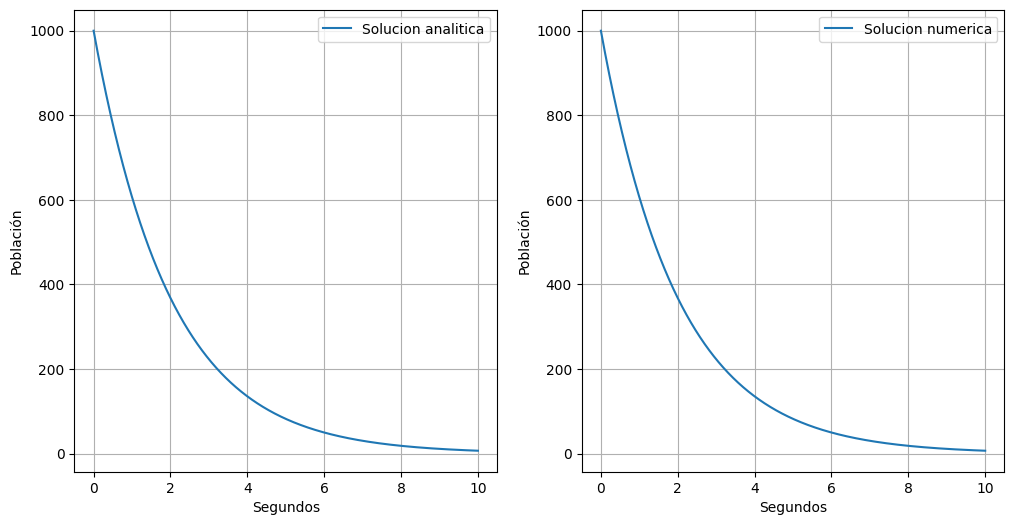

In [22]:
n, lamda = 1000, 0.5
T = np.linspace(0,10,100000)
Y1 = decaimiento_radiactivo(T, n, lamda)
Y2 = decaimiento_radiactivo_euler(T, n, lamda)

fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].plot(T,Y1, label = "Solucion analitica")
axs[0].grid()
axs[0].set_xlabel("Segundos")
axs[0].set_ylabel("Población")
axs[0].legend()

axs[1].plot(T,Y2, label = "Solucion numerica")
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("Segundos")
axs[1].set_ylabel("Población")

plt.show()

$$ \frac{d² y}{d t²} + γ \frac{d y}{d t} + ω²y = 0 $$

$$ $$

$$ \frac{d y}{d t} = v $$
$$ \frac{d ν}{d t} = - ( γv + ω²v ) $$

In [24]:
def oscilador_amortiguado_euler(T_,b_,k_,m_, y0_, v0_):

  gamma_, omega_cuadrado_, delta_t = b_ / m_, k_ / m_, T_[1] - T_[0]

  Y_, V_ = np.zeros(np.shape(T_)[0]), np.zeros(np.shape(T_)[0])
  V_[0], Y_[0] = v0_, y0_

  for i in range(np.shape(T_)[0] - 1):

    Y_[i + 1] = Y_[i] + delta_t * V_[i]
    V_[i + 1] = V_[i] - delta_t * ( gamma_ * V_[i] + omega_cuadrado_ * Y_[i] )

  return Y_


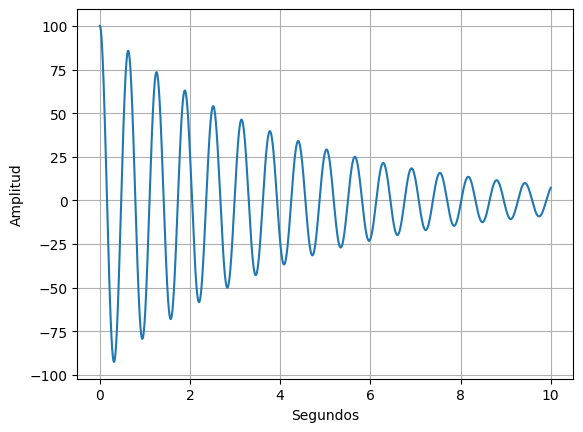

In [25]:
b, k, m = 1/2 , 100, 1
y0, v0 = 100, 0.1
T = np.linspace(0,10,100000)
Y = oscilador_amortiguado_euler(T, b, k, m, y0, v0)

plt.plot(T,Y)
plt.grid()
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.show()